# Mpox Genome Analysis using Biopython

### Fetch Mpox Genome from NCBI
**NC_063383** - Mpox genome used here was sequenced from a sample

In [1]:
!pip install Biopython
from Bio import Entrez, SeqIO
Entrez.email = ""
handle = Entrez.efetch(db="nucleotide", id="NC_063383", rettype="gb", retmode="text")
recs = list(SeqIO.parse(handle, 'gb'))
handle.close()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 11.4 MB/s eta 0:00:00


In [2]:
recs

[SeqRecord(seq=Seq('ATTTTACTATTTTATTTAGTGTCTAGAAAAAAATGTGTGACCCACGACCGTAGG...AAT'), id='NC_063383.1', name='NC_063383', description='Monkeypox virus, complete genome', dbxrefs=['BioProject:PRJNA485481'])]

In [3]:
Mpox_dna = recs[0].seq

In [4]:
Mpox_dna

Seq('ATTTTACTATTTTATTTAGTGTCTAGAAAAAAATGTGTGACCCACGACCGTAGG...AAT')

In [5]:
print(f'The genome of Mpox consists of {len(Mpox_dna)} nucleotides.')

The genome of Mpox consists of 197209 nucleotides.


In [6]:
# molecular weight
from Bio.SeqUtils import molecular_weight
molecular_weight(Mpox_dna)

60910683.70525165

In [7]:
# GC content - higher GC content implies more stable molecule due to G and C forming triple hydrogen bonds
from Bio.SeqUtils import gc_fraction
print(f'The GC content of Mpox genome is {gc_fraction}%')
a = gc_fraction(Mpox_dna)
GC = a*100

The GC content of Mpox genome is <function gc_fraction at 0x7e8c5c9863b0>%


In [8]:
# prompt: call <function gc_fraction at 0x7cb2ac3e24d0>%

GC


33.029932710981754

### Distribution of nucleotides in Mpox genome

> Add blockquote

> Add blockquote



protein pppppppppppppppppppppp





pppppprintpppppppppppp

In [12]:
count_nucleotides = {
    'A': Mpox_dna.count('A'),
    'T': Mpox_dna.count('T'),
    'C': Mpox_dna.count('C'),
    'G': Mpox_dna.count('G')
}

In [13]:
count_nucleotides

{'A': 66193, 'T': 65878, 'C': 32602, 'G': 32536}

Text(0.5, 1.0, 'Nucleotide Frequency')

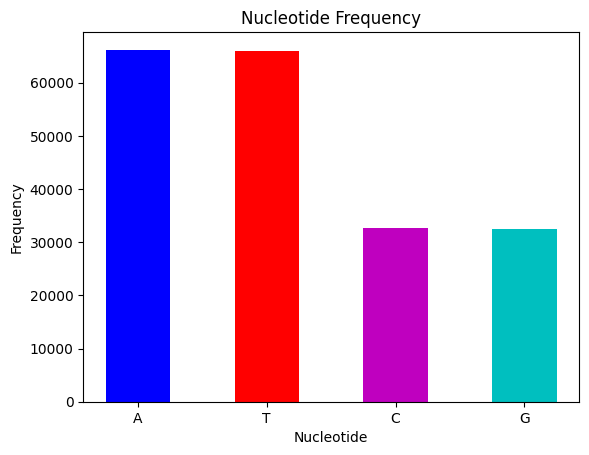

In [14]:
import matplotlib.pyplot as plt
width = 0.5
plt.bar(count_nucleotides.keys(), count_nucleotides.values(), width, color=['b', 'r', 'm', 'c'])
plt.xlabel('Nucleotide')
plt.ylabel('Frequency')
plt.title('Nucleotide Frequency')

First observation: The frequency of the nucleotides A and T is higher than the frequency of C and G.

Understanding this genetic information is the key to find cures and vaccines. So, the question here is: How do we extract information from this long sequence of letters?

This process is called gene expression: Gene expression is the process by which information from a gene is used in the synthesis of a functional gene product. These products are often proteins

### Transcription
Transcription is the first step in gene expression. It involves copying a gene's DNA sequence to make an RNA molecule.

In [16]:
Mpox_mrna = Mpox_dna.transcribe()
Mpox_mrna

Seq('AUUUUACUAUUUUAUUUAGUGUCUAGAAAAAAAUGUGUGACCCACGACCGUAGG...AAU')

### Translation
Translation is the process that takes the information passed from DNA as messenger RNA and turns it into a series of amino acids.

In [17]:
Mpox_aa = Mpox_mrna.translate()
Mpox_aa

/usr/local/lib/python3.10/dist-packages/Bio/Seq.py:2879: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


Seq('ILLFYLVSRKKCVTHDRRKL*RVRKINRL*RPSERGLIFL*DLSKRERIKTFYD...IVK')

In [18]:
#most common amino acids
from collections import Counter
common_amino = Counter(Mpox_aa)
common_amino.most_common(10)

[('L', 6920),
 ('I', 6772),
 ('S', 5568),
 ('*', 4471),
 ('Y', 3834),
 ('R', 3793),
 ('F', 3676),
 ('T', 3578),
 ('V', 3551),
 ('N', 3437)]

Text(0.5, 1.0, 'Protein Sequence Frequency')

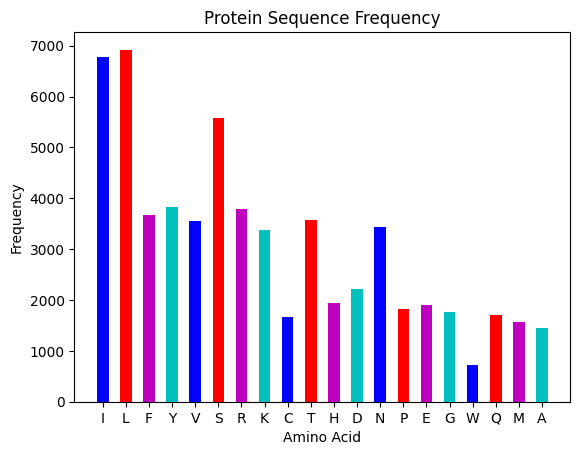

In [19]:
del common_amino['*']

width = 0.5
plt.bar(common_amino.keys(), common_amino.values(), width, color=['b', 'r', 'm', 'c'])
plt.xlabel('Amino Acid')
plt.ylabel('Frequency')
plt.title('Protein Sequence Frequency')

In [20]:
print(f"Mpox's genome has {sum(common_amino.values())} amino acids")

Mpox's genome has 61265 amino acids


The split() function splits the sequence at any stop codon and keeps the amino acids chains separated. This makes it easier for further analysis.

In [21]:
proteins = Mpox_aa.split('*')

In [22]:
proteins[:5]

[Seq('ILLFYLVSRKKCVTHDRRKL'),
 Seq('RVRKINRL'),
 Seq('RPSERGLIFL'),
 Seq('DLSKRERIKTFYDSIRKRFNIFVRPIEERKRWLVKIFFLVQKSMF'),
 Seq('NIWTRINLSV')]

In [23]:
print(f'We have {len(proteins)} amino acids in the Mpox genome')

We have 4472 amino acids in the Mpox genome


It's worth to mention that not all the amino acids sequences are proteins. Only the sequences with more than 20 amino acids code for functional proteins. The short amino acid sequences are oligopeptides and have other functionalities. Here, we will focus on the chains with more than 20 amino acid chains: Proteins.

In [24]:
for protein in proteins:
    if len(protein) < 20:
        proteins.remove(protein)

In [25]:
print(f'We have {len(proteins)} proteins with more than 20 amino acids in the Mpox genome')

We have 2473 proteins with more than 20 amino acids in the Mpox genome


In [26]:
top_5_proteins = sorted(proteins, key = len)

In [27]:
top_5_proteins[-1]

Seq('MDAAIRGNDVIFVLKTIGVPSACRQNEDPRFVEAFKCDELERYIDNNPECTLFE...SSP')

In [28]:
len(top_5_proteins[-1])

785

Save this protein to file for further analysis

In [29]:
with open("protein_seq.fasta", "w") as file:
    file.write(f">Mpox protein\n{top_5_proteins[-1]}")

## Summary of Findings
- Sequence length: 197209 base pairs
- GC content: 33.02%
- Has high amount of Leucine L and Serine S
- 2473 proteins with more than 20 amino acids
- The largest protein is of length of 785 amino acid.


In [30]:
top_5_proteins[-1]

Seq('MDAAIRGNDVIFVLKTIGVPSACRQNEDPRFVEAFKCDELERYIDNNPECTLFE...SSP')